# The Sparks Foundation
## Exploratory Data Analysis
## Anyan Festus

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline

In [2]:
# Reading the dataset
store_df = pd.read_csv('SampleSuperstore.csv')
store_df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [3]:
#Cheking the number of rows and columns in the dataset
store_df.shape

(9994, 13)

In [4]:
# Looking at the data types of each variable
store_df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

Comments
1. The 'store_df.dtypes' code above isn't really necessary because 'store_df.info()' does that.
2. The Postal code variable must be a string not numeric. You know in real life, postal code can be compared to telephone numbers. You can't perform statistical analysis on them.

In [5]:
# Getting information about the dataset
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
#Checking for missing values
store_df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
# Looking out for duplicated rows
store_df.loc[store_df.duplicated()]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [8]:
#Dropping duplicated rows
store_df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [9]:
store_df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [10]:
#Descriptive statistics of the quantitative varables
store_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Visualizing the Quantivative Varibles

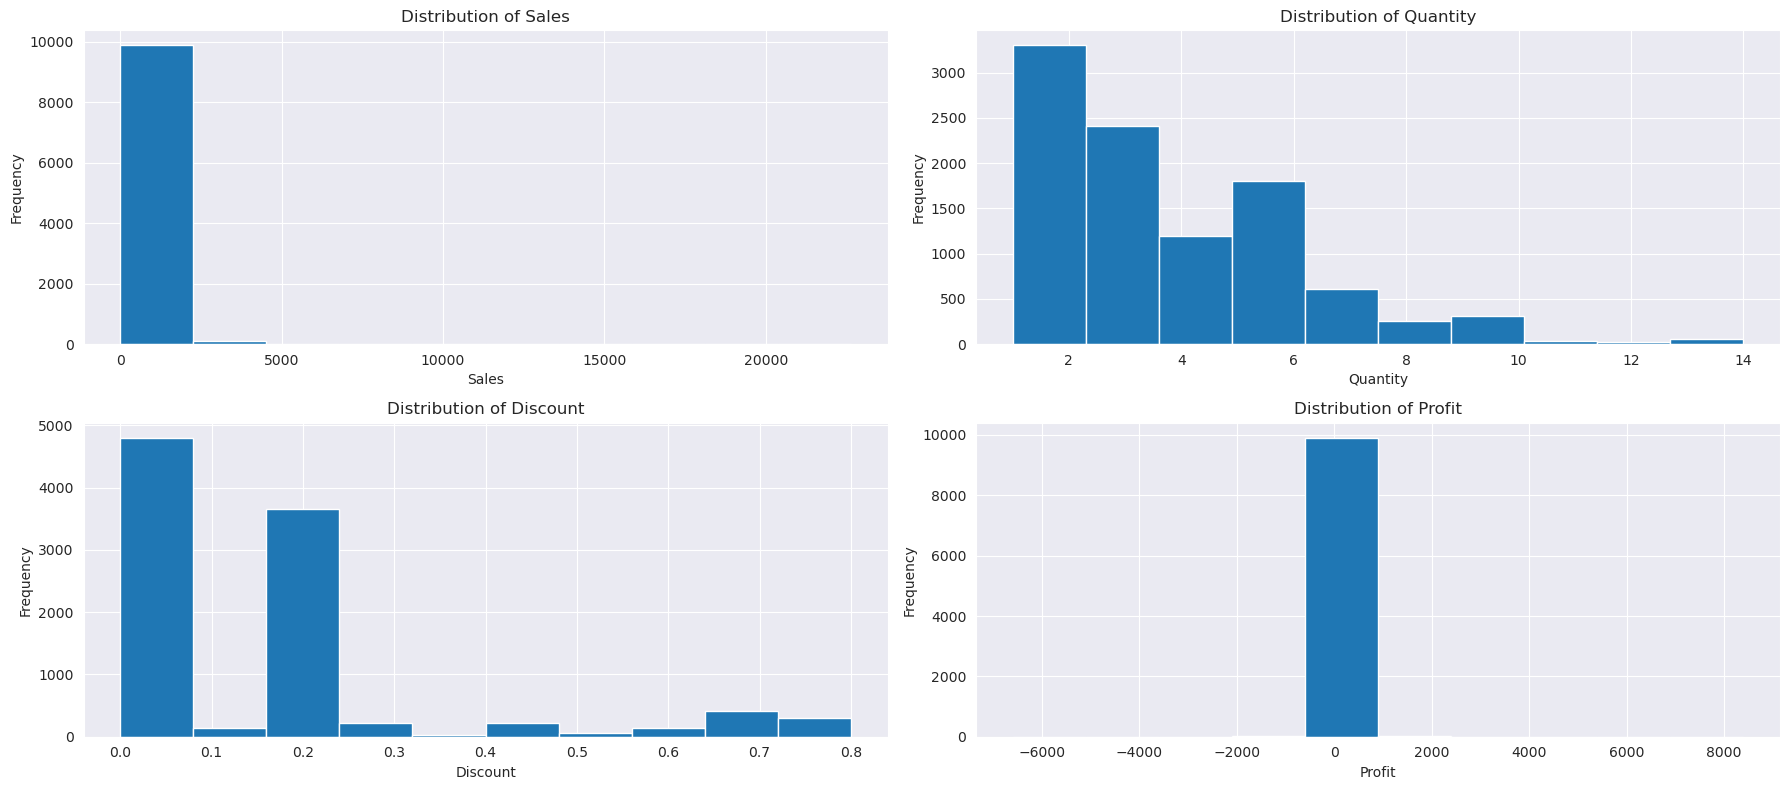

In [11]:
# Select only the quantitative variables
quantitative_vars = ['Sales', 'Quantity', 'Discount', 'Profit']

num_rows = 2
num_cols = (len(quantitative_vars) + 1) // 2

# Create the figure and axes for the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 8))

# Reshape the axes array to handle different number of variables
axs = axs.ravel()

# Loop through the quantitative variables and plot on separate axes
for i, var in enumerate(quantitative_vars):
    ax = axs[i]
    ax.hist(store_df[var], bins=10)
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {var}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

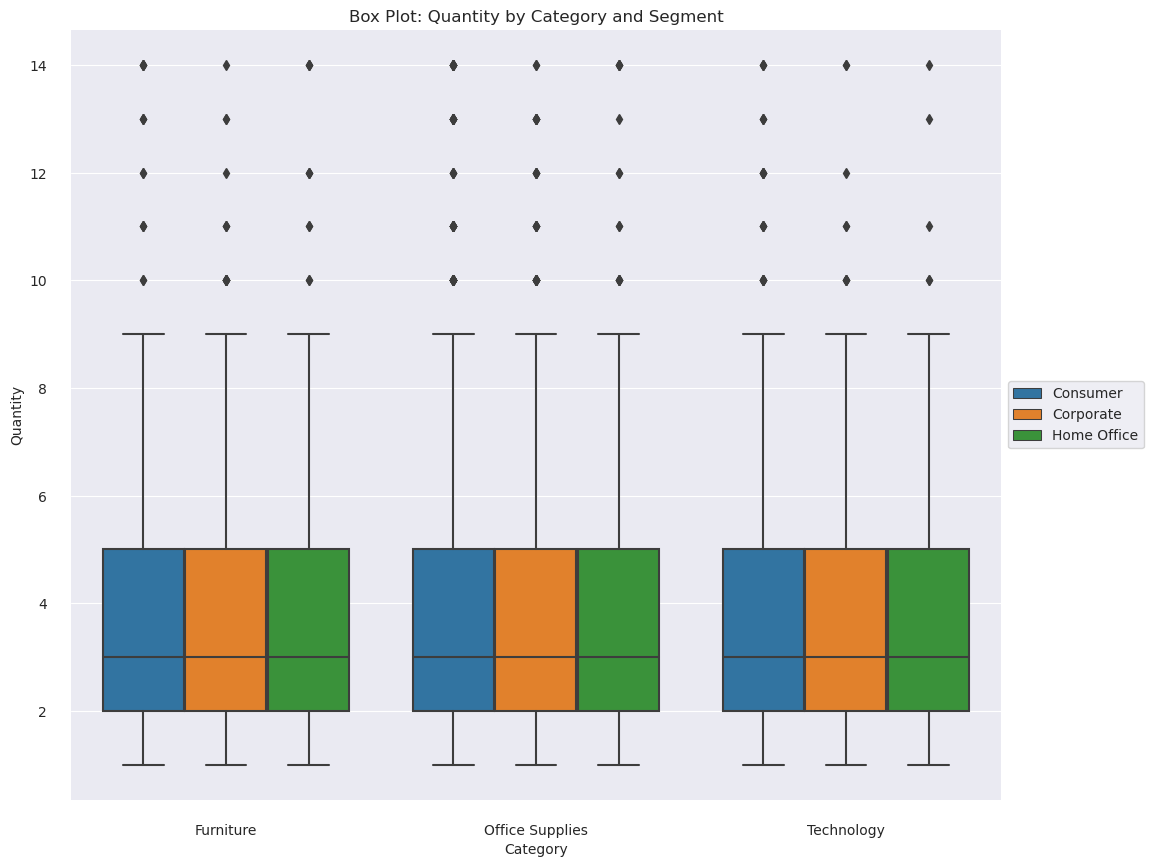

In [12]:
#Drawing a boxplot show how the quantity of the various Categories based on The segments
fig, ax = plt.subplots(figsize=(12,10))
sns.boxplot(x="Category", y="Quantity",
            hue="Segment", 
            data=store_df).set(title ='Box Plot: Quantity by Category and Segment')
sns.despine(offset=10)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

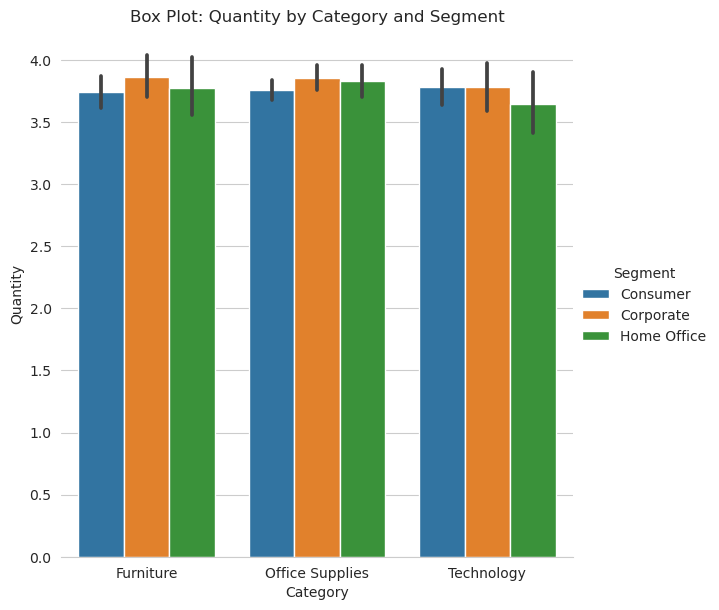

In [13]:
#Dwawing a categorical Bar plot to compare the boxplot
sns.set_style('whitegrid')
g = sns.catplot(
    data=store_df, kind="bar",
    x="Category", y="Quantity", hue="Segment", height=6
).set(title ='Box Plot: Quantity by Category and Segment')
g.despine(left=True)

In [14]:
store_df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

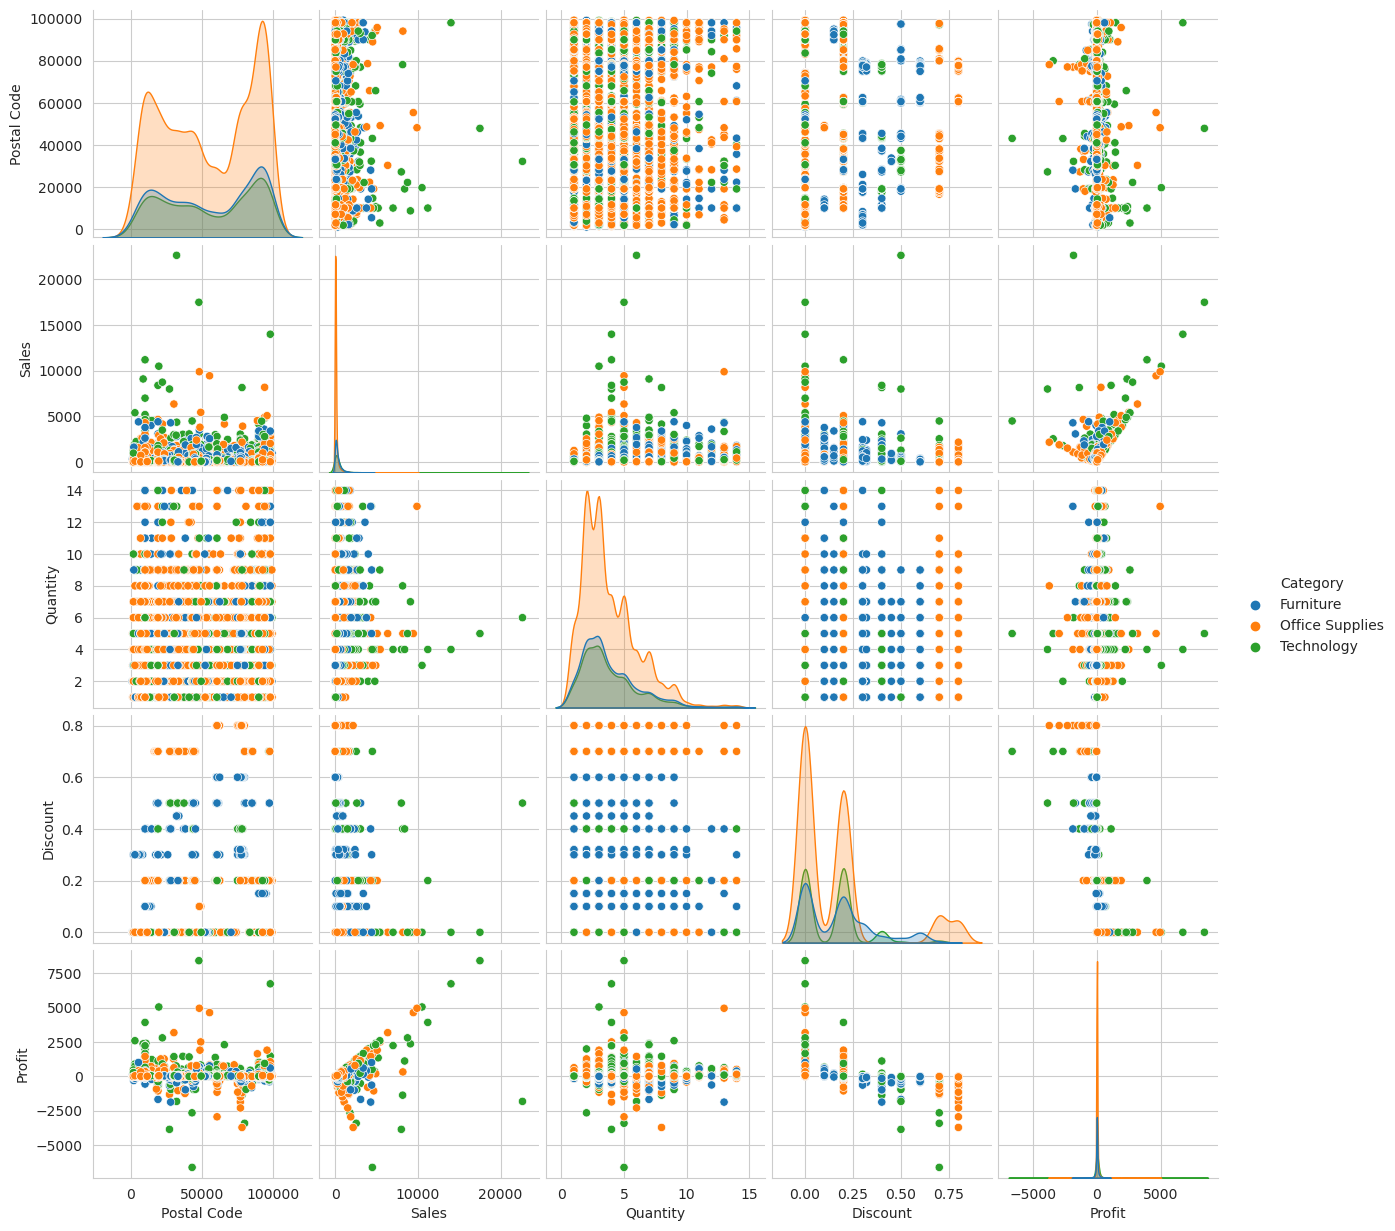

In [15]:
sns.pairplot(data=store_df, hue='Category', diag_kind='kde', markers='o')
plt.show()

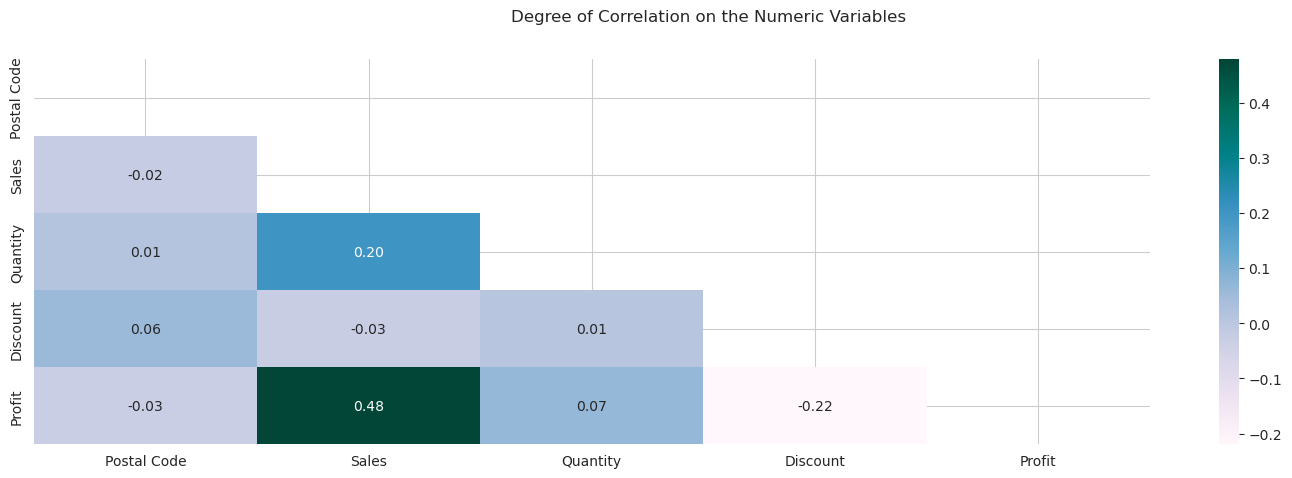

In [16]:
corr = store_df.corr()
plt.figure(figsize=(18, 5))
sns.heatmap(corr, annot=True, fmt=".2f", mask=np.triu(np.ones_like(store_df.corr(), dtype=bool)), cmap='PuBuGn')
plt.suptitle('Degree of Correlation on the Numeric Variables')
plt.show()

In [27]:
#Count plot on the categorical/norminal variables

store_df['Postal Code'] = store_df['Postal Code'].astype(object)
cat_variables = [col for col in store_df.columns if store_df[col].dtypes == 'object']

# Calculate the number of subplots required
num_plots = len(cat_variables)

# Determine the number of rows and columns for subplots
num_rows = (num_plots + 1) // 2  # Round up to the nearest integer
num_cols = 2

# Create a figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Plot countplots for each variable
for i, variable in enumerate(cat_variables):
    # Determine the appropriate subplot index
    row = i // num_cols
    col = i % num_cols
    
    # Select the correct subplot using indexing
    if num_rows > 1:
        ax = axes[row, col]
    else:
        ax = axes[col]
    
    sns.countplot(x=variable, data=store_df, ax=ax)
    ax.set_xlabel(variable)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

['Ship Mode',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Category',
 'Sub-Category']